In [1]:
from torchdiffeq import odeint_adjoint as odeint
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
import pandas as pd
import torch
import torch.nn as nn
from tqdm import tqdm

In [3]:
x = torch.tensor([1.0])  # Ensure torch is initialized

In [26]:
#Make a network 
class SimpleFeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_layers, depth, output_dim, activation_func=nn.Tanh()):
        super(SimpleFeedforwardNN, self).__init__()

        layers = []
        layers.append(nn.Linear(input_dim, depth))
        layers.append(activation_func)

        for _ in range(hidden_layers):
            layers.append(nn.Linear(depth, depth))
            layers.append(activation_func)

        layers.append(nn.Linear(depth, output_dim))
        self.network = nn.Sequential(*layers)

        #Setting initial weights
        for m in self.network.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=1)
                nn.init.constant_(m.bias, val=0)

    def forward(self, t, x):
        return self.network(x)

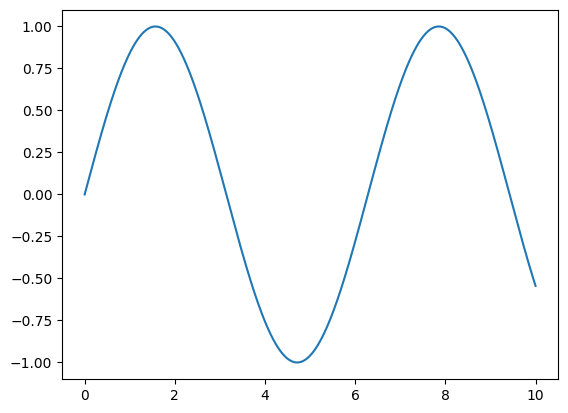

In [66]:
model = SimpleFeedforwardNN(input_dim=1, hidden_layers=1, depth=10, output_dim=1, activation_func=nn.Tanh())
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate for stability
loss_fn = nn.MSELoss()


t = torch.linspace(0, 10, 1001)
x = torch.sin(t).unsqueeze(1)
plt.plot(t, x)

In [71]:
num_epochs = 10
losses = []
for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    
    pred_x = model(t = None, x = x)
    loss = loss_fn(pred_x, x)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

100%|██████████| 10/10 [00:00<00:00, 651.60it/s]


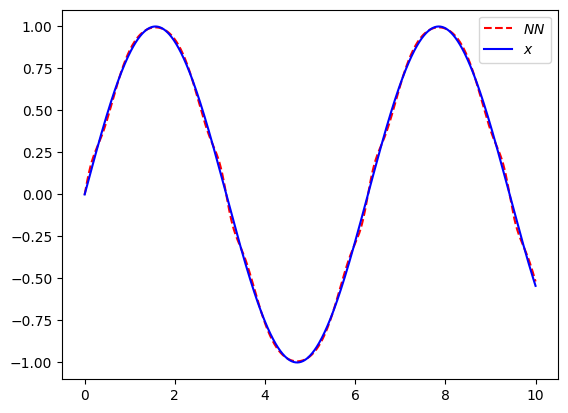

In [77]:
output = model(t = None, x = x)
plt.plot(t, output.detach().numpy(), color='r', label=r'$NN$', linestyle='--')
plt.plot(t, x, color='b', label=r'$x$', linestyle='-')
plt.legend()

##### Spiral

In [85]:
def spiral(theta, a=0.0, b=0.1):
    r = a + b * theta
    x = r * torch.cos(theta)
    y = r * torch.sin(theta)
    return x, y

In [87]:
x, y = spiral(t, a=0.0, b=0.1)

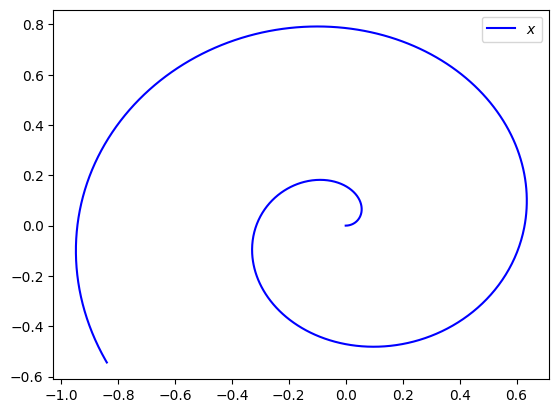

In [88]:
plt.plot(x, y, color='b', label=r'$x$', linestyle='-')
plt.legend()

In [102]:
model = SimpleFeedforwardNN(input_dim=2, hidden_layers=2, depth=10, output_dim=2, activation_func=nn.Tanh())
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate for stability
loss_fn = nn.MSELoss()

In [103]:
data = torch.stack([x, y], dim=1)

In [104]:
num_epochs = 100
losses = []
for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    
    pred_x = model(t = None, x = data)
    loss = loss_fn(pred_x, data)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

100%|██████████| 100/100 [00:00<00:00, 678.02it/s]


In [105]:
output = model(t = None, x = data)

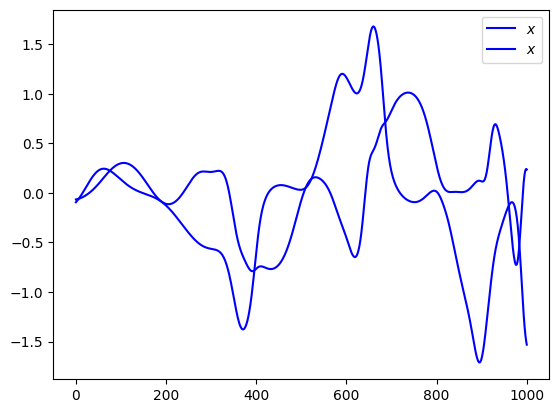

In [106]:
plt.plot(output.detach().numpy(), color='b', label=r'$x$', linestyle='-')
plt.legend()